In [1]:
import numpy as np
import pandas as pd

In [2]:
df = pd.read_csv('/kaggle/input/sms-spam/spam.csv', encoding = "utf-8")

In [3]:
df.sample(10)

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
2598,ham,Okie... Thanx...,NaN,NaN,NaN
1289,ham,Hey...Great deal...Farm tour 9am to 5pm $95/pa...,NaN,NaN,NaN
2518,ham,Joy's father is John. Then John is the NAME of...,NaN,NaN,NaN
3284,ham,They are just making it easy to pay back. I ha...,NaN,NaN,NaN
4602,ham,And I don't plan on staying the night but I pr...,NaN,NaN,NaN
2377,spam,YES! The only place in town to meet exciting a...,NaN,NaN,NaN
588,ham,Ya srsly better than yi tho,NaN,NaN,NaN
1587,ham,"Dont search love, let love find U. Thats why i...",NaN,NaN,NaN
5017,ham,Babe ! What are you doing ? Where are you ? Wh...,NaN,NaN,NaN
1619,ham,Friends that u can stay on fb chat with,NaN,NaN,NaN


In [4]:
df.info()
df = df.drop(columns = ['Unnamed: 2','Unnamed: 3','Unnamed: 4'])

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [5]:
df.sample(5)

,v1,v2
1167,ham,Lol now I'm after that hot air balloon!
4012,ham,Ok.
857,ham,Hai ana tomarrow am coming on morning. &lt;DE...
5108,ham,The sign of maturity is not when we start sayi...
4349,ham,Yes. Rent is very expensive so its the way we ...


In [6]:
df.rename(columns = {'v1':'type','v2':'sms'},inplace = True)

In [7]:
df.sample(5)

,type,sms
2806,spam,December only! Had your mobile 11mths+? You ar...
3378,ham,Dear umma she called me now :-)
1495,ham,Hey gals.. Anyone of u going down to e driving...
2859,ham,I want to be there so i can kiss you and feel ...
825,ham,Hmm .. Bits and pieces lol ... *sighs* ...


In [8]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
df['type']= encoder.fit_transform(df['type'])

In [9]:
df.head()

,type,sms
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [10]:
#find null values
df.isnull().sum()

type    0
sms     0
dtype: int64

No null values are here

In [11]:
#find duplicates
df.duplicated().sum()

403

403 duplicates are there

In [12]:
df = df.drop_duplicates(keep = 'first')
df.duplicated().sum()

0

Duplicates are removed

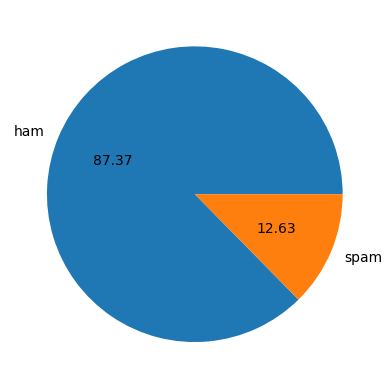

In [13]:
df['type'].value_counts()
import matplotlib.pyplot as plt
plt.pie(df['type'].value_counts(), labels = ['ham','spam'],autopct="%0.2f")
plt.show()

In [14]:
import nltk

In [15]:
!pip install nltk

^C


In [16]:
df['sms'].apply(len)

0       111
1        29
2       155
3        49
4        61
       ... 
5567    161
5568     37
5569     57
5570    125
5571     26
Name: sms, Length: 5169, dtype: int64

In [17]:
df['numofchar'] = df['sms'].apply(len)

In [18]:
df.head()

,type,sms,numofchar
0,0,"Go until jurong point, crazy.. Available only ...",111
1,0,Ok lar... Joking wif u oni...,29
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,0,U dun say so early hor... U c already then say...,49
4,0,"Nah I don't think he goes to usf, he lives aro...",61


In [19]:
df['numofwords'] =df['sms'].apply(lambda x : len(nltk.word_tokenize(x)))

In [20]:
df.head()

,type,sms,numofchar,numofwords
0,0,"Go until jurong point, crazy.. Available only ...",111,23
1,0,Ok lar... Joking wif u oni...,29,8
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37
3,0,U dun say so early hor... U c already then say...,49,13
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15


In [21]:
df['numofsent'] =df['sms'].apply(lambda x : len(nltk.sent_tokenize(x)))
df.head()

,type,sms,numofchar,numofwords,numofsent
0,0,"Go until jurong point, crazy.. Available only ...",111,23,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1


In [22]:
df['sms'].apply(lambda x: nltk.sent_tokenize(x))

0       [Go until jurong point, crazy.., Available onl...
1                        [Ok lar..., Joking wif u oni...]
2       [Free entry in 2 a wkly comp to win FA Cup fin...
3       [U dun say so early hor... U c already then sa...
4       [Nah I don't think he goes to usf, he lives ar...
                              ...                        
5567    [This is the 2nd time we have tried 2 contact ...
5568              [Will Ì_ b going to esplanade fr home?]
5569    [Pity, * was in mood for that., So...any other...
5570    [The guy did some bitching but I acted like i'...
5571                        [Rofl., Its true to its name]
Name: sms, Length: 5169, dtype: object

In [23]:
df[df['type']==0][['numofchar','numofwords', 'numofsent']].describe()

,numofchar,numofwords,numofsent
count,4516.000000,4516.000000,4516.000000
mean,70.459256,16.957484,1.815545
std,56.358207,13.394052,1.364098
min,2.000000,1.000000,1.000000
25%,34.000000,8.000000,1.000000
50%,52.000000,13.000000,1.000000
75%,90.000000,22.000000,2.000000
max,910.000000,219.000000,38.000000


In [24]:
df[df['type']==1][['numofchar','numofwords', 'numofsent']].describe()

,numofchar,numofwords,numofsent
count,653.000000,653.000000,653.000000
mean,137.891271,27.474732,2.969372
std,30.137753,6.893007,1.488910
min,13.000000,2.000000,1.000000
25%,132.000000,25.000000,2.000000
50%,149.000000,29.000000,3.000000
75%,157.000000,32.000000,4.000000
max,224.000000,44.000000,9.000000


In [25]:
import seaborn as sns

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='numofchar', ylabel='Count'>

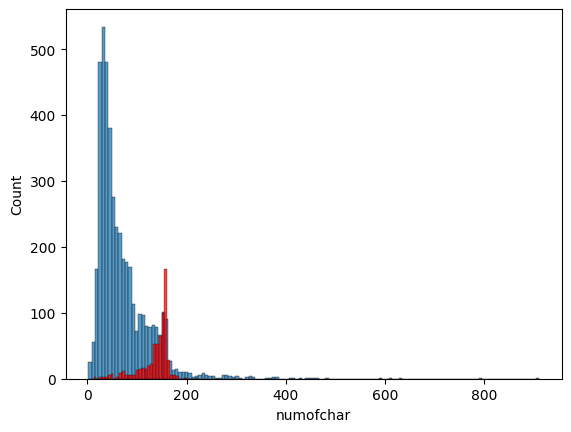

In [26]:
sns.histplot(df[df['type']==0]['numofchar'])
sns.histplot(df[df['type']==1]['numofchar'],color = 'red')

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='numofwords', ylabel='Count'>

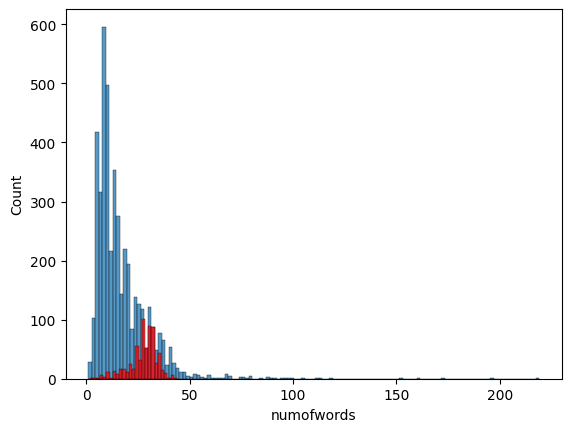

In [27]:
sns.histplot(df[df['type']==0]['numofwords'])
sns.histplot(df[df['type']==1]['numofwords'],color = 'red')

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated a

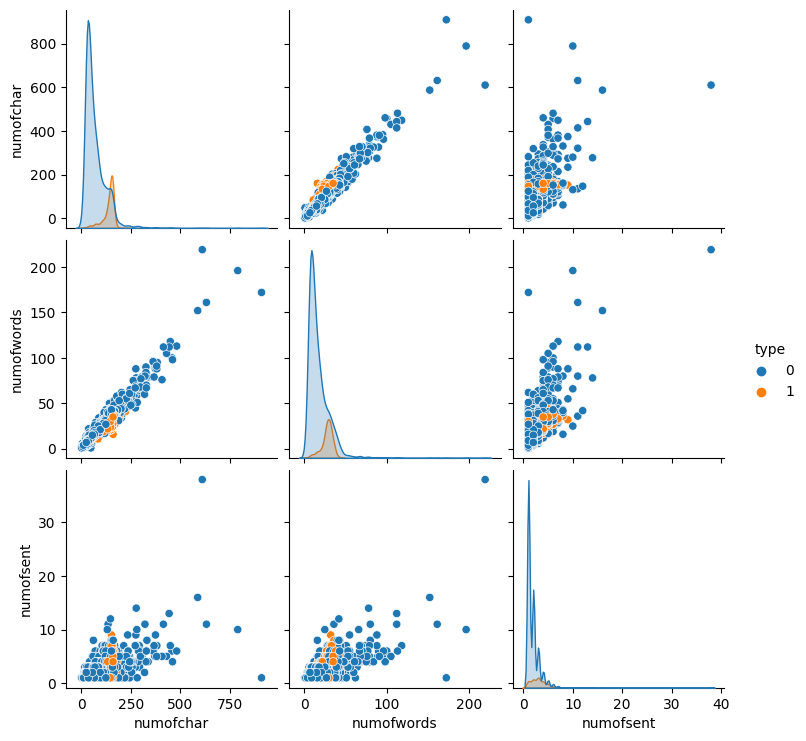

In [28]:
sns.pairplot(df, hue = 'type');

In [29]:
import string
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [30]:
from nltk.corpus import stopwords


In [31]:
from nltk.stem.porter import PorterStemmer
ps = PorterStemmer()

In [32]:
def transform(text):
    text = text.lower()
    text = nltk.word_tokenize(text)
    y = []
    for i in text:
        if i.isalnum():
            y.append(i)
    text = y[:]
    y.clear()
    for i in text :
        if i not in stopwords.words('english') and i not in string.punctuation:
            y.append(i)
    text = y[:]
    y.clear()
    for i in text :
        y.append(ps.stem(i))
    return " ".join(y)
transform('Hi is the@ $$ % how are You mother motra')

'hi mother motra'

In [33]:
df['tranformed_text']= df['sms'].apply(transform)

In [34]:
df.head()

,type,sms,numofchar,numofwords,numofsent,tranformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,23,2,go jurong point avail bugi n great world la e ...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


In [35]:
from wordcloud import WordCloud
wc = WordCloud(width = 500, height=500, min_font_size = 10, background_color= 'white')

In [36]:
spam_wc = wc.generate(df[df['type']==1]['tranformed_text'].str.cat(sep  = " "))

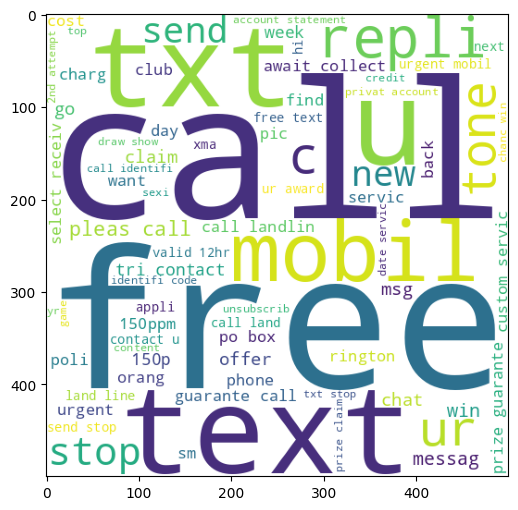

In [37]:
plt.figure(figsize=(15,6))
plt.imshow(spam_wc)

In [38]:
ham_wc = wc.generate(df[df['type']==0]['tranformed_text'].str.cat(sep  = " "))

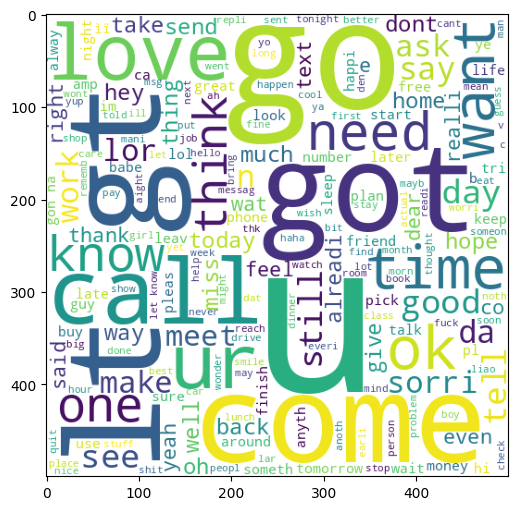

In [39]:
plt.figure(figsize=(15,6))
plt.imshow(ham_wc)

In [40]:
spam_corpus = []
for msg in df[df['type']==1]['tranformed_text'].tolist():
    for word in msg.split():
        spam_corpus.append(word)
print(len(spam_corpus))

9883


In [41]:
ham_corpus = []
for msg in df[df['type']==0]['tranformed_text'].tolist():
    for word in msg.split():
        ham_corpus.append(word)
print(len(ham_corpus))

34771


In [42]:
from collections import Counter
pd.DataFrame(Counter(spam_corpus).most_common(30))[0]
pd.DataFrame(Counter(spam_corpus).most_common(30))[1]

0     320
1     189
2     155
3     141
4     122
5     119
6     119
7     114
8     104
9     103
10     98
11     82
12     76
13     74
14     64
15     64
16     63
17     60
18     57
19     57
20     56
21     55
22     52
23     51
24     50
25     49
26     48
27     45
28     45
29     45
Name: 1, dtype: int64

In [43]:
import seaborn as sns

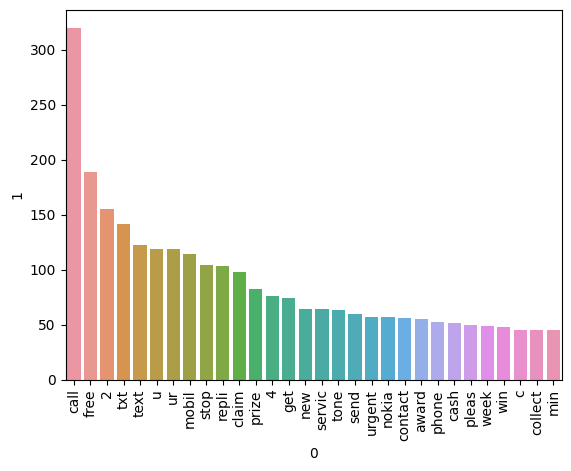

In [44]:
sns.barplot(x  = pd.DataFrame(Counter(spam_corpus).most_common(30))[0],y  = pd.DataFrame(Counter(spam_corpus).most_common(30))[1])
plt.xticks(rotation = 'vertical')
plt.show()

In [45]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
cv  = CountVectorizer()
tv = TfidfVectorizer(max_features =3000)

In [46]:
X= tv.fit_transform(df['tranformed_text']).toarray()

In [47]:
# from sklearn.preprocessing import MinMaxScaler
# scaler  = MinMaxScaler()
# X = scaler.fit_transform(X)

In [48]:
X.shape

(5169, 3000)

In [49]:
Y = df['type'].values

In [50]:
Y

array([0, 0, 1, ..., 0, 0, 0])

In [51]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size = 0.2, random_state = 2)

In [52]:
from sklearn.naive_bayes import GaussianNB, MultinomialNB, BernoulliNB
gnb = GaussianNB()
mnb = MultinomialNB()
bnb = BernoulliNB()
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score

In [53]:
gnb.fit(X_train,Y_train)
Y_pred1 = gnb.predict(X_test)
print(accuracy_score(Y_test,Y_pred1))
print(confusion_matrix(Y_test,Y_pred1))
print(precision_score(Y_test,Y_pred1))

0.867504835589942
[[785 111]
 [ 26 112]]
0.5022421524663677


In [54]:
mnb.fit(X_train,Y_train)
Y_pred2 = mnb.predict(X_test)
print(accuracy_score(Y_test,Y_pred2))
print(confusion_matrix(Y_test,Y_pred2))
print(precision_score(Y_test,Y_pred2))

0.9729206963249516
[[896   0]
 [ 28 110]]
1.0


In [55]:
bnb.fit(X_train,Y_train)
Y_pred3 = bnb.predict(X_test)
print(accuracy_score(Y_test,Y_pred3))
print(confusion_matrix(Y_test,Y_pred3))
print(precision_score(Y_test,Y_pred3))

0.9816247582205029
[[895   1]
 [ 18 120]]
0.9917355371900827


TFIDF with mnb .Tried voting and stacking but no better results .

In [66]:
import pickle
pickle.dump(tv, open('vectorizer.pkl','wb'))
pickle.dump(mnb, open('model.pkl','wb'))